# Visualising our training data

Our training data is the whitened noisy EMRI. Some definitions:

$d_A(t)$ : the noisy detector stream in the A channel

$h_A(t)$ : be the GW strain of the EMRI in the A channel

$n_A(t)$ : be the noise background in the A channel. 

Before pre-processing, we start with

$h_A(t)$

And then we overlay a noise background to get

$d_A(t)=h_A(t)+n_A(t)$

Lastly, the noise-whitening operation is done on $d_A(t)$ and is represented as $\tilde{d}_A(t)$

In [ ]:
import numpy as np
import cupy as xp
import matplotlib.pyplot as plt
from EMRI_generator_TDI import EMRIGeneratorTDI
from fastlisaresponse.utils.utility import get_overlap

: 

In [2]:
#Let's load our sets of EMRI params
EMRI_params= np.load("training_data/EMRI_params_SNRs_20_100_fixed_redshift.npy", allow_pickle=True)

In [3]:
EMRI_params.shape

(18390, 14)

In [4]:
#Initialise the EMRI generator object
dim=2**20#23#20
dt=10
TDI_channels="AE"

generator= EMRIGeneratorTDI(EMRI_params_dir="training_data/EMRI_params_SNRs_20_100_fixed_redshift.npy", batch_size=1,  dim=dim, dt=dt, TDI_channels=TDI_channels, add_noise=False)

In [5]:
#How long is our EMRI?
print("Time window of EMRI: {:} years".format(generator.T))

Time window of EMRI: 0.33226789525261163 years


In [6]:
#Choose a particular set of EMRI parameters from our dataset
example_EMRI_params= EMRI_params[0,:]

In [7]:
#Generate h(t) in the A and E channels
EMRI_h= generator.generate_TDI_EMRI(example_EMRI_params)

In [8]:
#Generate whitened h(t) in the A channel
EMRI_h_whitened= generator.noise_whiten_AET(EMRI_h, dt, channels=["AE","AE"])

In [9]:
#To get the time steps in years
t= np.linspace(0, generator.T, num=generator.dim)

Text(0.5, 1.0, 'Unwhitened EMRI')

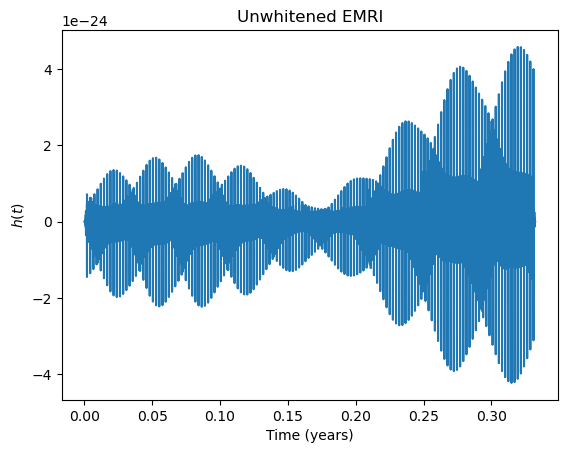

In [10]:
#Plot one channel of h(t)
plt.plot(t, EMRI_h[1].get())
plt.xlabel("Time (years)")
plt.ylabel("$h(t)$")
plt.title("Unwhitened EMRI")

Text(0.5, 1.0, 'Whitened EMRI')

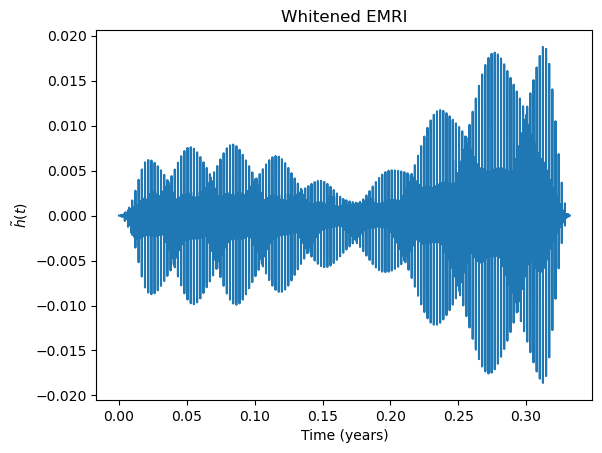

In [11]:
#Plot one channel of whitened h(t)
plt.plot(t, EMRI_h_whitened[1].get())
plt.xlabel("Time (years)")
plt.ylabel("$\~{h}(t)$")
plt.title("Whitened EMRI")

In [13]:
#Generate n(t) in the A and E channels
noise= generator.noise_td_AET(dim, dt, channels=["AE","AE"])

In [14]:
#Generate whitened n(t) in the A and E channels
noise_whitened= generator.noise_whiten_AET(noise, dt, channels=["AE","AE"])

Text(0.5, 1.0, 'LISA noise')

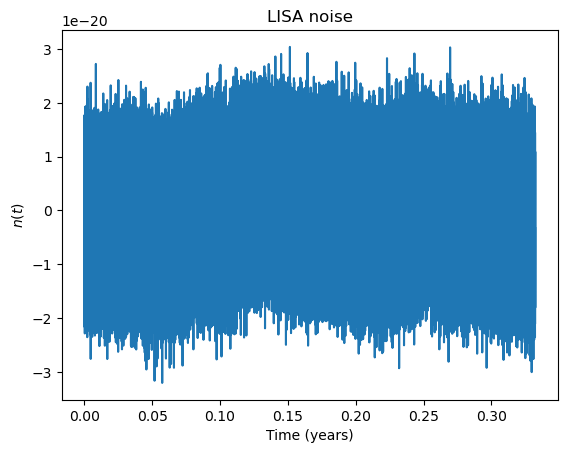

In [15]:
#Plot one channel of n(t)
plt.plot(t, noise[1].get())
plt.xlabel("Time (years)")
plt.ylabel("$n(t)$")
plt.title("LISA noise")

Text(0.5, 1.0, 'Whitened LISA noise')

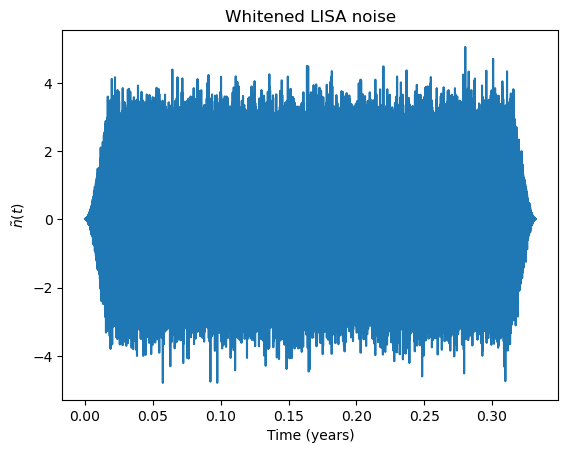

In [16]:
#Plot one channel of whitened n(t)
plt.plot(t, noise_whitened[1].get())
plt.xlabel("Time (years)")
plt.ylabel("$\~n(t)$")
plt.title("Whitened LISA noise")

In [17]:
#Calculate d_t in the A channel
d_A_t= [EMRI_h[0]+noise[0], EMRI_h[1]+noise[1]]

In [18]:
#Calculate whitened d_t
d_A_t_whitened= generator.noise_whiten_AET(d_A_t, dt, channels=["AE","AE"])

Text(0.5, 1.0, 'EMRI signal on noise background')

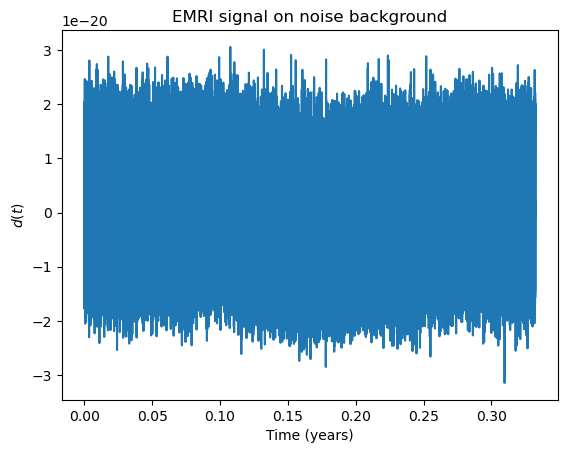

In [19]:
#plot d_t
plt.plot(t, d_A_t[0].get())
plt.xlabel("Time (years)")
plt.ylabel("$d(t)$")
plt.title("EMRI signal on noise background")

Text(0.5, 1.0, 'EMRI signal on noise background')

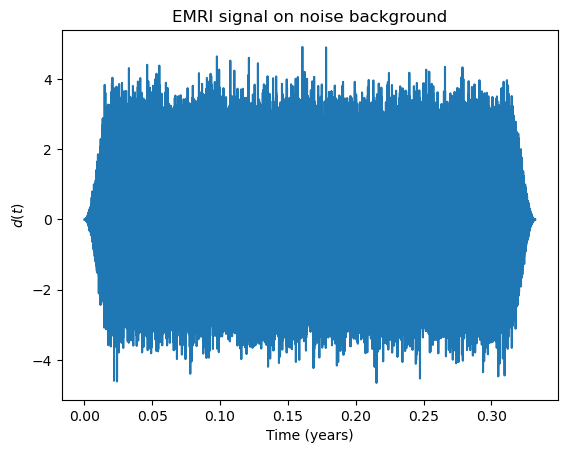

In [21]:
#plot whitened d_t
plt.plot(t, d_A_t_whitened[0].get())
plt.xlabel("Time (years)")
plt.ylabel("$d(t)$")
plt.title("EMRI signal on noise background")

In [ ]:
#Let's look at a super-loud signal
param_dir= "SNRs_redshift_point1/"
param_arr_fname= "11011_EMRI_params_SNRs_60_100.npy"
EMRI_params= np.load(param_dir+param_arr_fname, allow_pickle=True)
SNR_arr= np.load(param_dir+"11011_EMRI_SNRs_60_100.npy")


max_arr_A_E= np.load(param_dir+param_arr_fname[:-4]+"_all_maxes_A_E.npy")

index_max_A= np.argmax(max_arr_A_E[:,0])

waveform= xp.asarray(generate_EMRI_AET(EMRI_params[index_max_A], EMRI_TDI_0PA_ecc))

waveform= noise_whiten_AET(waveform, dt=dt, channels=["AE","AE"])

plt.figure()
plt.plot(waveform[0,:].get())

plt.savefig("High-max_waveform.png")

#Experimental: what does a histogram of h(t) look like?
'''plt.figure()
plt.hist(waveform[0,:].get(), bins=1024)
plt.savefig("High-max_waveform_hist.png")'''

In [ ]:
stdev_arr_A_E= np.load(param_dir+param_arr_fname[:-4]+"_all_stdevs_A_E.npy")

index_max_std_A= np.argmax(stdev_arr_A_E[:,0])

waveform= xp.asarray(generate_EMRI_AET(EMRI_params[index_max_std_A], EMRI_TDI_0PA_ecc))

waveform= noise_whiten_AET(waveform, dt=dt, channels=["AE","AE"])

plt.figure()
plt.plot(waveform[0,:].get())

plt.savefig("High-stdev_waveform.png")

'''plt.figure()
plt.hist(waveform[0,:].get(), bins=64)
plt.savefig("High-max_stdev_waveform_hist.png")'''

